In [14]:
%matplotlib inline

import numpy as np 
import matplotlib.pyplot as plt 
import scipy as sci  
from mpl_toolkits import mplot3d
import matplotlib 
import warnings
warnings.filterwarnings("ignore")      # be carefull


eps0 = 8.845e-12

K = 1 / (4*np.pi*eps0)



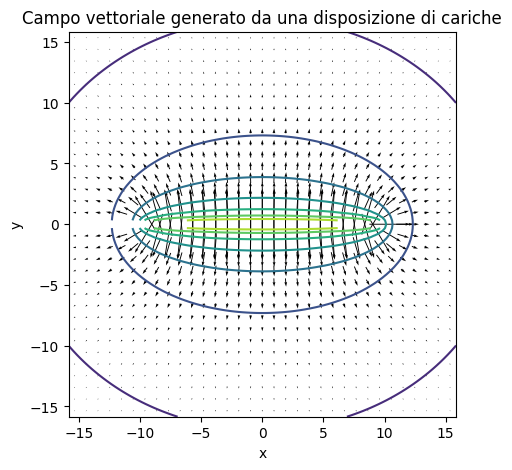

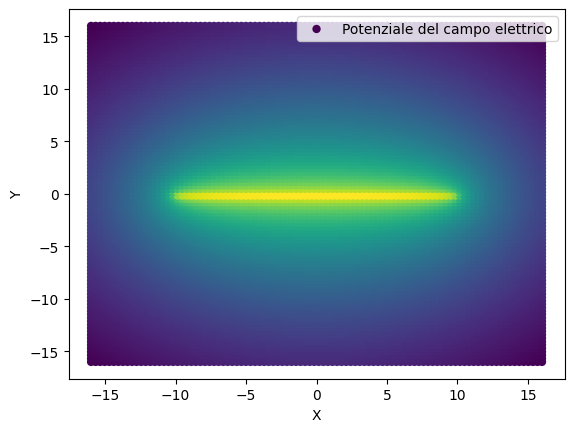

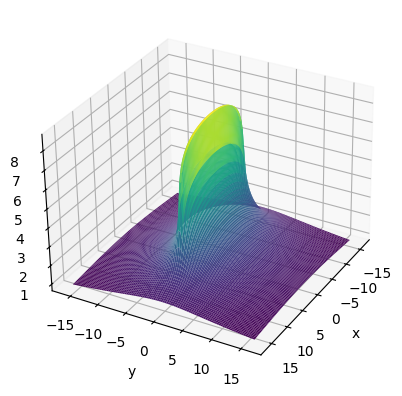

In [7]:


agg = 6 #aggiungere in caso di zeri al denominatore per ovviare a problemi di runtime

u = 10
def f(x,y):
    return  K * np.log((x+u+np.sqrt((x+u)**2+y**2))/(x-u+np.sqrt((x-u)**2+y**2)))


o = 16

x_range = y_range = np.linspace(-o, o, 101)
x ,y = np.meshgrid(x_range, y_range)

dfdy, dfdx = np.gradient(-f(x,y), o/100)

a = 2
b = 3
plt.figure(figsize = (5,5))
plt.contour(f(x,y), origin = 'upper', extent = (-o,o,-o,o))
Q = plt.quiver(x[a::b,a::b], y[a::b,a::b], dfdx[a::b,a::b], dfdy[a::b,a::b], pivot = 'middle' )  #[a::b,a::b]

plt.title('Campo vettoriale generato da una disposizione di cariche')
#plt.quiverkey(Q, 0.73, 0.9, 10, "CV", labelpos = 'E')
plt.axis('tight')
plt.xlabel('x')
plt.ylabel('y')

plt.plot()
plt.show()




x = np.linspace(-o, o, 100)
y = np.linspace(-o, o, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)


plt.scatter(X, Y, c=Z,edgecolors='none', norm=matplotlib.colors.LogNorm(), label = 'Potenziale del campo elettrico')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()



fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', rstride = 1, cstride = 1, edgecolor = 'none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V(x,y)')
ax.view_init(30, 30, 1)
plt.show()


campo generato da una spira muovendosi sull'asse centrale

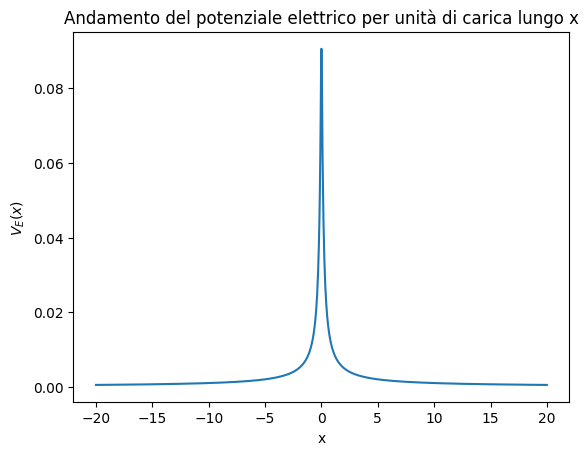

In [8]:

l = 7.
R = 0.2
sigma = 8.85e-12
lambd = 1.
z = 1
alfa = 1
beta = 2

def g(x):
    return sigma / (2 * eps0) * (np.sqrt(x**2+R**2)-abs(x))


d = np.linspace(-20, 20, 1000)


plt.plot(d, g(d))
plt.title('Andamento del potenziale elettrico per unità di carica lungo x')
plt.xlabel('x')
plt.ylabel('$V_E(x)$')
plt.yscale('linear')
plt.show()

Potenziale di una distribuzione cilindrica lungo l'asse X: V = (1e-6*R)/(eps0*2)*np.log(abs((np.sqrt((x+l)**2+R**2)+x+l)/(np.sqrt((x-l)**2+R**2)+x-l))) 
#
Potenziale di una spira carica lungo l'asse x: V = (lambda * R) / (2 * eps0)*1/np.sqrt(x**2 + R**2)
#
Potenziale di una barra sottile centrata nell'origine: K * np.log((x+u+np.sqrt((x+u)**2+y**2))/(x-u+np.sqrt((x-u)**2+y**2)))
#
Potenziale di un disco sottile sull'asse : sigma / (2 * eps0) * (np.sqrt(x**2+R**2)-abs(x))

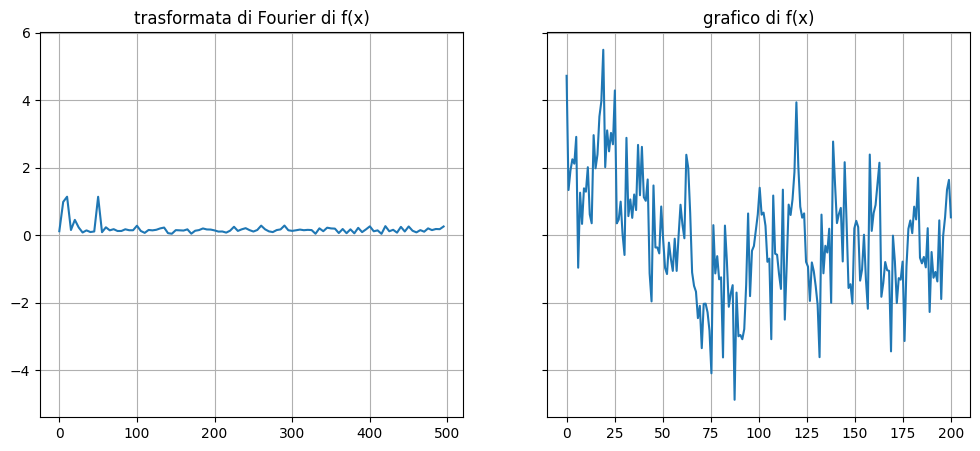

In [9]:
#Trasformate di fourier?

from scipy.fft import fft, fftfreq
import numpy as np 
# Number of sample points
N = 200
# sample spacing
T = 1.0 / 1000.0
x = np.linspace(0.0, N, N)
y = np.sin(2.0 * 2.0*np.pi*x) + 0.5*np.sin(4.0 * 2.0*np.pi*x) + np.cos(10*2*np.pi*x) + np.cos(100*x)+ np.cos(2*x*x)*np.exp(np.cos(x))
yf = fft(y)
xf = fftfreq(N, T)[:N//2]

fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize = (12,5))

ax1.plot( xf, 2.0/N * np.abs(yf[0: N//2]))
ax1.set_title('trasformata di Fourier di f(x)')
#ax1.xlabel('ν[Hz]')
#ax1.ylabel('F(f)')
ax1.grid()
ax1.set_xscale('linear')


ax2.plot(x,y)
ax2.set_title('grafico di f(x)')
#ax2.xlabel('x')
#ax2.ylabel('f(x)')
ax2.grid()



2.00000000000000


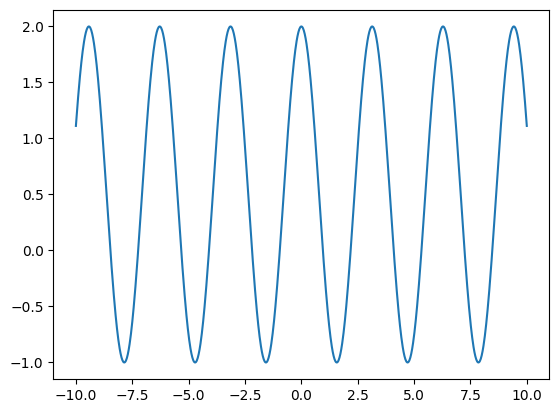

In [10]:
import sympy as sp


x, y, z = sp.symbols('x y z')

z = x**y

z = sp.cos(2*x) + sp.cos(x)**2
#sp.expand_trig(z)
#z.subs(sp.sin(2*x),2*sp.sin(x)*sp.cos(2*x))
#sp.pi.evalf(10)


#si può sostituire tutto insieme:

dl = z.evalf(subs={x:sp.pi})
print(dl)
#si possono semplificare le espressioni:
def simplify():
    return sp.simplify()


z.simplify()

x = np.linspace(-10, 10, 1000)

def fz(x):
    return np.cos(2*x) + np.cos(x)**2


plt.plot(x, fz(x))

plt.show()